In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import statsmodels.api as sm

from sklearn.feature_selection import RFECV

import tensorflow as tf
from tensorflow import keras
from hyperopt import fmin, tpe, hp
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


from sklearn.ensemble import AdaBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.base import BaseEstimator, ClassifierMixin



In [2]:
df = pd.read_csv('Encoded.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Encoded.csv'

In [ ]:
X = df.drop('Reached', axis = 1)
y = df['Reached']

In [ ]:
X.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Mode_of_Shipment_Flight,Mode_of_Shipment_Road
0,4,2,177,3,1,0,44,1233,0,0,0,1,1,0
1,4,5,216,2,1,1,59,3088,0,0,0,0,1,0
2,2,2,183,4,1,1,48,3374,1,0,0,0,1,0
3,3,3,176,4,2,1,10,1177,0,1,0,0,1,0
4,2,2,184,3,2,0,46,2484,0,0,1,0,1,0


<Axes: >

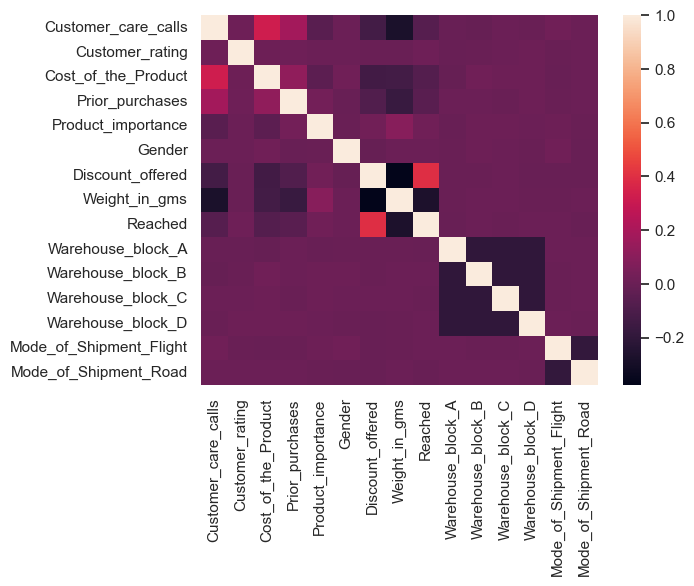

In [ ]:
sns.heatmap(df.corr())

In [ ]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [1 / (1 - sm.OLS(y, X[col]).fit().rsquared) for col in X.columns]

# Display the VIF values
vif


,Variable,VIF
0,Customer_care_calls,2.154363
1,Customer_rating,1.971260
2,Cost_of_the_Product,2.229486
3,Prior_purchases,1.942722
4,Product_importance,2.089600
5,Gender,1.424870
6,Discount_offered,1.889797
7,Weight_in_gms,1.673436
8,Warehouse_block_A,1.106271
9,Warehouse_block_B,1.112737


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Get feature names (column names in your dataset)
feature_names = df.columns

# Sort features by importance in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for i in range(len(feature_names)):
    print(f"{i + 1}. {feature_names[sorted_idx[i]]}: {feature_importances[sorted_idx[i]]:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(feature_names)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_names)), np.array(feature_names)[sorted_idx], rotation=45)
plt.tight_layout()
plt.show()

Feature ranking:
1. Weight_in_gms: 0.2838
2. Discount_offered: 0.2196
3. Cost_of_the_Product: 0.1776
4. Prior_purchases: 0.0598
5. Customer_rating: 0.0591
6. Customer_care_calls: 0.0561
7. Product_importance: 0.0318
8. Gender: 0.0230
9. Mode_of_Shipment_Flight: 0.0164
10. Warehouse_block_D: 0.0162
11. Warehouse_block_B: 0.0143
12. Reached: 0.0143
13. Warehouse_block_A: 0.0140
14. Warehouse_block_C: 0.0139


IndexError: index 14 is out of bounds for axis 0 with size 14